In [64]:
print('sklearn test!')

sklearn test!


In [65]:
print('LR and SGD test begin!')
# logistic regression
# SGD 分类
# 乳腺癌肿瘤预测

import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt

column_names = ['code number','feature1','feature2','feature3','feature4','feature5','feature6','feature7','feature8','feature9','class_label']
# dataset =pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',names=column_names)
# 导入数据
dataset = pd.read_csv('./dataset/breast-cancer-wisconsin.csv')
dataset = dataset.replace('?',np.nan)
# print('dataset shape:',dataset.shape)
dataset = dataset.dropna(how='any')
# print('dataset shape:',dataset.shape)

# cross_validation 交叉检验
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(dataset[column_names[1:9]], dataset[column_names[-1]], test_size=0.25, random_state=33)
# print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

# 归一化处理 standardscaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# print(x_train)
x_train = ss.fit_transform(x_train)
x_test  = ss.transform(x_test)
# print(x_train)

# LogisticRegression和SGDclassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

# 实例化
lr = LogisticRegression()
sgdc = SGDClassifier()

# 模型拟合
lr.fit(x_train,y_train)
sgdc.fit(x_train,y_train)

# 预测
lr_y_predict = lr.predict(x_test)
sgdc_y_predict = sgdc.predict(x_test)

# 模型报告
from sklearn.metrics import classification_report
lr_report = classification_report(y_test, lr_y_predict, target_names=['2','4'])
sgdc_report = classification_report(y_test, sgdc_y_predict, target_names=['2','4'])
print('lr--report:\n',lr_report)
print('sgdc--report:\n',sgdc_report)

print('LR and SGD test end!')

LR and SGD test begin!
lr--report:
               precision    recall  f1-score   support

           2       0.99      0.99      0.99       100
           4       0.99      0.99      0.99        71

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

sgdc--report:
               precision    recall  f1-score   support

           2       1.00      0.97      0.98       100
           4       0.96      1.00      0.98        71

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

LR and SGD test end!


In [66]:
print('SVC test begin!')
import pandas as pd

from sklearn.datasets import load_digits
digits = load_digits()
# print(digits.data.shape)

# 数据分割
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=33)
# print(x_train.shape,x_test.shape)

# 标准化处理
# print(pd.unique(x_train[:,1]))
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

# 模型拟合
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
lsvc.fit(x_train,y_train)
y_predict = lsvc.predict(x_test)

# 评估
print('linear svc test score:',lsvc.score(x_test,y_test))
print('linear svc train score:',lsvc.score(x_train,y_train))
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_predict,target_names=digits.target_names.astype(str))      
print('\nlinear svc classification report:\n',cr)


print('SVC test end!')

SVC test begin!
linear svc test score: 0.9533333333333334
linear svc train score: 0.9933184855233853

linear svc classification report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        35
           1       0.96      0.98      0.97        54
           2       0.98      1.00      0.99        44
           3       0.93      0.93      0.93        46
           4       0.97      1.00      0.99        35
           5       0.94      0.94      0.94        48
           6       0.96      0.98      0.97        51
           7       0.92      1.00      0.96        35
           8       0.98      0.84      0.91        58
           9       0.95      0.91      0.93        44

    accuracy                           0.95       450
   macro avg       0.95      0.96      0.95       450
weighted avg       0.95      0.95      0.95       450

SVC test end!


In [67]:
print('Bayes test begin!')
# 朴素贝叶斯

from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups(subset='all')
# print(len(news.data))
# print(news.data[0])

# 数据分割
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(news.data,news.target,test_size=0.25,random_state=33)
# print(len(x_train),len(x_test))

# 文本特征向量转换模块
from sklearn.feature_extraction.text import CountVectorizer
cvect = CountVectorizer()
x_train = cvect.fit_transform(x_train)
x_test = cvect.transform(x_test)
# print(type(x_train))

# 模型拟合
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_predict = mnb.predict(x_test)

# 模型检验
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_predict,target_names=news.target_names)
print('\nnaive bayes test report:\n',cr)


print('Bayes test end!')

Bayes test begin!

naive bayes test report:
                           precision    recall  f1-score   support

             alt.atheism       0.86      0.86      0.86       201
           comp.graphics       0.59      0.86      0.70       250
 comp.os.ms-windows.misc       0.89      0.10      0.17       248
comp.sys.ibm.pc.hardware       0.60      0.88      0.72       240
   comp.sys.mac.hardware       0.93      0.78      0.85       242
          comp.windows.x       0.82      0.84      0.83       263
            misc.forsale       0.91      0.70      0.79       257
               rec.autos       0.89      0.89      0.89       238
         rec.motorcycles       0.98      0.92      0.95       276
      rec.sport.baseball       0.98      0.91      0.95       251
        rec.sport.hockey       0.93      0.99      0.96       233
               sci.crypt       0.86      0.98      0.91       238
         sci.electronics       0.85      0.88      0.86       249
                 sci.med      

In [68]:
print('KNN test begin!')
# KNN 分类

from sklearn.datasets import load_iris
iris = load_iris()
# print(iris.data.shape)
# print(iris.DESCR)

# 数据分割
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.25,random_state=33)
# print(x_train.shape,x_test.shape)

# 数据预处理
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

# 模型拟合
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_predict = knn.predict(x_test)

# classification report
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_predict,target_names=iris.target_names)
print('\nknn classification report:\n',cr)

print('KNN test end!')

KNN test begin!

knn classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.73      1.00      0.85        11
   virginica       1.00      0.79      0.88        19

    accuracy                           0.89        38
   macro avg       0.91      0.93      0.91        38
weighted avg       0.92      0.89      0.90        38

KNN test end!


In [69]:
print('Trees test begin!')
import pandas as pd

titanic = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt')
# print(titanic.info())
# print(titanic.describe())
x = titanic[['pclass','age','sex']]
y = titanic['survived']

# age 缺失值处理
x['age'].fillna(x['age'].mean(),inplace=True)
# pclass sex处理
# print(x_train.head())
from sklearn.feature_extraction import DictVectorizer
dvec = DictVectorizer(sparse=False)
x = dvec.fit_transform(x.to_dict(orient='record'))
# x = pd.DataFrame(x)
# print(x.describe())

# crossvalidation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=33)
# print(x_train.shape,x_test.shape)

# 模型拟合
# 单一决策树：decisiontree classifier
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_dtree_predict = dtree.predict(x_test)
# 随机森林：randomforest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_rfc_predict = rfc.predict(x_test)
# 梯度提升决策树：gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_gbc_predict = gbc.predict(x_test)


# classificaton report
from sklearn.metrics import classification_report
cr_dtree = classification_report(y_test,y_dtree_predict,target_names=['died','survived'])
print('\ndecision tree classifier report:\n',cr_dtree)
cr_rfc = classification_report(y_test,y_rfc_predict,target_names=['died','survived'])
print('\nrandomforest classifier report:\n',cr_rfc)
cr_gbc = classification_report(y_test,y_gbc_predict,target_names=['died','survived'])
print('\ngradient boosting classifier report:\n',cr_gbc)




print('Trees test end!')

Trees test begin!

decision tree classifier report:
               precision    recall  f1-score   support

        died       0.78      0.91      0.84       202
    survived       0.80      0.58      0.67       127

    accuracy                           0.78       329
   macro avg       0.79      0.74      0.75       329
weighted avg       0.78      0.78      0.77       329


randomforest classifier report:
               precision    recall  f1-score   support

        died       0.78      0.90      0.83       202
    survived       0.79      0.59      0.68       127

    accuracy                           0.78       329
   macro avg       0.78      0.75      0.76       329
weighted avg       0.78      0.78      0.77       329


gradient boosting classifier report:
               precision    recall  f1-score   support

        died       0.78      0.92      0.84       202
    survived       0.82      0.58      0.68       127

    accuracy                           0.79       329
  

In [70]:
print('Linear regression test begin!\n')
# linear regression
from sklearn.datasets import load_boston
boston = load_boston()
# print(boston.DESCR)

# cross validation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(boston.data,boston.target,test_size=0.25,random_state=33)

# 标准归一化处理
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
x_train = ss_x.fit_transform(x_train)
x_test = ss_x.transform(x_test)
ss_y = StandardScaler()
y_train = ss_y.fit_transform(y_train.reshape(-1, 1))
y_test = ss_y.transform(y_test.reshape(-1, 1))
# print(y_train.shape)

# 模型拟合
# linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_lr_predict = lr.predict(x_test)
# sgd regressor
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor()
sgdr.fit(x_train,y_train)
y_sgdr_predict = sgdr.predict(x_test)

# 模型评估
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
# r2_score
r2_score_lr = r2_score(ss_y.inverse_transform(y_test),ss_y.inverse_transform(y_lr_predict))
r2_score_sgdr = r2_score(ss_y.inverse_transform(y_test),ss_y.inverse_transform(y_sgdr_predict))
# mean squared error
ms_error_lr = mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(y_lr_predict))
ms_error_sgdr = mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(y_sgdr_predict))
# mean absolute error
ma_error_lr = mean_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(y_lr_predict))
ma_error_sgdr = mean_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(y_sgdr_predict))
print('r2 score of linear regression:\t\t\t%.4f'%r2_score_lr)
print('r2 score of sgd regression:\t\t\t%.4f\n'%r2_score_sgdr)
print('mean squared error of linear regression:\t%.4f'%ms_error_lr)
print('mean squared error of sgd regression:\t\t%.4f\n'%ms_error_sgdr)
print('mean absolute error of linear regression:\t%.4f'%ma_error_lr)
print('mean absolute error of sgd regression:\t\t%.4f'%ma_error_sgdr)

print('\nLinear regression test end!')


Linear regression test begin!

r2 score of linear regression:			0.6758
r2 score of sgd regression:			0.6680

mean squared error of linear regression:	25.1392
mean squared error of sgd regression:		25.7439

mean absolute error of linear regression:	3.5325
mean absolute error of sgd regression:		3.4896

Linear regression test end!


In [71]:
print('SVR regression test begin!\n')
# SVR regression
from sklearn.datasets import load_boston
boston = load_boston()
# print(boston.DESCR)

# cross validation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(boston.data,boston.target,test_size=0.25,random_state=33)

# 标准归一化处理
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
x_train = ss_x.fit_transform(x_train)
x_test = ss_x.transform(x_test)
ss_y = StandardScaler()
y_train = ss_y.fit_transform(y_train.reshape(-1, 1))
y_test = ss_y.transform(y_test.reshape(-1, 1))
# print(y_train.shape)

# # 模型拟合
# from sklearn.svm import SVR
# # SVR kernel='linear'
# svr_linear = SVR(kernel='linear')
# svr_linear.fit(x_train,y_train)
# y_svr_linear_predict = svr_linear.predict(x_test)
# # SVR kernel='poly'
# svr_poly = SVR(kernel='poly')
# svr_poly.fit(x_train,y_train)
# y_svr_poly_predict = svr_poly.predict(x_test)
# # SVR kernel='rbf'
# svr_rbf = SVR(kernel='rbf')
# svr_rbf.fit(x_train,y_train)
# y_svr_rbf_predict = svr_rbf.predict(x_test)

# # 模型评估
# from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
# # r2_score
# r2_score_svr_linear = r2_score(ss_y.inverse_transform(y_test),ss_y.inverse_transform(y_svr_linear_predict))
# r2_score_svr_poly = r2_score(ss_y.inverse_transform(y_test),ss_y.inverse_transform(y_svr_poly_predict))
# r2_score_svr_rbf = r2_score(ss_y.inverse_transform(y_test),ss_y.inverse_transform(y_svr_rbf_predict))
# # mean squared error
# ms_error_svr_linear = mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(y_svr_linear_predict))
# ms_error_svr_poly = mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(y_svr_poly_predict))
# ms_error_svr_rbf = mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(y_svr_rbf_predict))
# # mean absolute error
# ma_error_svr_linear = mean_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(y_svr_linear_predict))
# ma_error_svr_poly = mean_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(y_svr_poly_predict))
# ma_error_svr_rbf = mean_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(y_svr_rbf_predict))
# print('r2 score of SVR linear regression:\t\t\t%.4f'%r2_score_svr_linear)
# print('r2 score of SVR poly regression:\t\t\t%.4f'%r2_score_svr_poly)
# print('r2 score of SVR rbf regression:\t\t\t\t%.4f\n'%r2_score_svr_rbf)

# print('mean squared error of SVR linear regression:\t\t%.4f'%ms_error_svr_linear)
# print('mean squared error of SVR poly regression:\t\t%.4f'%ms_error_svr_poly)
# print('mean squared error of SVR rbf regression:\t\t%.4f\n'%ms_error_svr_rbf)

# print('mean absolute error of SVR linear regression:\t\t%.4f'%ma_error_svr_linear)
# print('mean absolute error of SVR poly regression:\t\t%.4f'%ma_error_svr_poly)
# print('mean absolute error of SVR rbf regression:\t\t%.4f'%ma_error_svr_rbf)

from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
model_data = {'svr_ins':{},'y_predict':{},'r2_score':{},'ms_error':{},'ma_error':{}}
kernel_list = ['linear','poly','rbf']
for svr_kernel in kernel_list:
    model_data['svr_ins'][svr_kernel] =  SVR(kernel=svr_kernel)
    model_data['svr_ins'][svr_kernel].fit(x_train,y_train)
    model_data['y_predict'][svr_kernel] = model_data['svr_ins'][svr_kernel].predict(x_test)
    model_data['r2_score'][svr_kernel] = r2_score(ss_y.inverse_transform(y_test), ss_y.inverse_transform(model_data['y_predict'][svr_kernel]))
    model_data['ms_error'][svr_kernel] = mean_squared_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(model_data['y_predict'][svr_kernel]))
    model_data['ma_error'][svr_kernel] = mean_absolute_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(model_data['y_predict'][svr_kernel]))
score_list = ['r2_score','ms_error','ma_error']
for svr_score in score_list:
    print()
    for svr_kernel in kernel_list:
        print('%8s of SVR %6s regression:\t%.4f'%(svr_score, svr_kernel, model_data[svr_score][svr_kernel]))



print('\nSVR regression test end!')

SVR regression test begin!


r2_score of SVR linear regression:	0.6507
r2_score of SVR   poly regression:	0.4037
r2_score of SVR    rbf regression:	0.7560

ms_error of SVR linear regression:	27.0883
ms_error of SVR   poly regression:	46.2417
ms_error of SVR    rbf regression:	18.9209

ma_error of SVR linear regression:	3.4328
ma_error of SVR   poly regression:	3.7384
ma_error of SVR    rbf regression:	2.6068

SVR regression test end!


In [72]:
print('KNN regression test begin!\n')
# KNN regression
from sklearn.datasets import load_boston
boston = load_boston()
# print(boston.DESCR)

# cross validation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(boston.data,boston.target,test_size=0.25,random_state=33)

# 标准归一化处理
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
x_train = ss_x.fit_transform(x_train)
x_test = ss_x.transform(x_test)
ss_y = StandardScaler()
y_train = ss_y.fit_transform(y_train.reshape(-1, 1))
y_test = ss_y.transform(y_test.reshape(-1, 1))
# print(y_train.shape)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
model_data = {'KNN_ins':{},'y_predict':{},'r2_score':{},'ms_error':{},'ma_error':{}}
weights_list = ['uniform','distance']
for KNN_weight in weights_list:
    model_data['KNN_ins'][KNN_weight] =  KNeighborsRegressor(weights=KNN_weight)
    model_data['KNN_ins'][KNN_weight].fit(x_train,y_train)
    model_data['y_predict'][KNN_weight] = model_data['KNN_ins'][KNN_weight].predict(x_test)
    model_data['r2_score'][KNN_weight] = r2_score(ss_y.inverse_transform(y_test), ss_y.inverse_transform(model_data['y_predict'][KNN_weight]))
    model_data['ms_error'][KNN_weight] = mean_squared_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(model_data['y_predict'][KNN_weight]))
    model_data['ma_error'][KNN_weight] = mean_absolute_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(model_data['y_predict'][KNN_weight]))
score_list = ['r2_score','ms_error','ma_error']
for KNN_score in score_list:
    print()
    for KNN_weight in weights_list:
        print('%8s of KNN %8s regression:\t%2.4f'%(KNN_score, KNN_weight, model_data[KNN_score][KNN_weight]))

print('\nKNN regression test end!')

KNN regression test begin!


r2_score of KNN  uniform regression:	0.6907
r2_score of KNN distance regression:	0.7201

ms_error of KNN  uniform regression:	23.9819
ms_error of KNN distance regression:	21.7031

ma_error of KNN  uniform regression:	2.9650
ma_error of KNN distance regression:	2.8011

KNN regression test end!


In [73]:
print('TREE regression test begin!\n')
# TREE regression
from sklearn.datasets import load_boston
boston = load_boston()
# print(boston.DESCR)

# cross validation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(boston.data,boston.target,test_size=0.25,random_state=33)

# 标准归一化处理
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
x_train = ss_x.fit_transform(x_train)
x_test = ss_x.transform(x_test)
ss_y = StandardScaler()
y_train = ss_y.fit_transform(y_train.reshape(-1, 1))
y_test = ss_y.transform(y_test.reshape(-1, 1))
# print(y_train.shape)

# 模型拟合
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_predict = dtr.predict(x_test)

# 模型评估
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
# r2_score
r2_score = r2_score(ss_y.inverse_transform(y_test),ss_y.inverse_transform(y_predict))
# mean squared error
ms_error = mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(y_predict))
# mean absolute error
ma_error = mean_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(y_predict))
print('r2 score            of Decision TREE regression:%.4f'%r2_score)
print('mean squared error  of Decision TREE regression:%.4f'%ms_error)
print('mean absolute error of Decision TREE regression:%.4f'%ma_error)
print('\nTREE regression test end!')

TREE regression test begin!

r2 score            of Decision TREE regression:0.5306
mean squared error  of Decision TREE regression:36.3997
mean absolute error of Decision TREE regression:3.5150

TREE regression test end!


In [74]:
print('Ensemble regression test begin!\n')
# Ensemble regression
from sklearn.datasets import load_boston
boston = load_boston()
# print(boston.DESCR)

# cross validation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(boston.data,boston.target,test_size=0.25,random_state=33)

# 标准归一化处理
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
x_train = ss_x.fit_transform(x_train)
x_test = ss_x.transform(x_test)
ss_y = StandardScaler()
y_train = ss_y.fit_transform(y_train.reshape(-1, 1))
y_test = ss_y.transform(y_test.reshape(-1, 1))
# print(y_train.shape)

from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
model_data = {'model':{},'y_predict':{},'r2_score':{},'ms_error':{},'ma_error':{}}
model_list = ['RandomForestRegressor','ExtraTreesRegressor','GradientBoostingRegressor']
for ensemble_model in model_list:
    model_data['model'][ensemble_model] = eval(ensemble_model)()
    model_data['model'][ensemble_model].fit(x_train,y_train)
    model_data['y_predict'][ensemble_model] = model_data['model'][ensemble_model].predict(x_test)
    model_data['r2_score'][ensemble_model] = r2_score(ss_y.inverse_transform(y_test), ss_y.inverse_transform(model_data['y_predict'][ensemble_model]))
    model_data['ms_error'][ensemble_model] = mean_squared_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(model_data['y_predict'][ensemble_model]))
    model_data['ma_error'][ensemble_model] = mean_absolute_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(model_data['y_predict'][ensemble_model]))
score_list = ['r2_score','ms_error','ma_error']
for ensemble_score in score_list:
    print()
    for ensemble_model in model_list:
        print('%8s of ensemble %26s regression:\t%2.4f'%(ensemble_score, ensemble_model, model_data[ensemble_score][ensemble_model]))

print('\nEnsemble regression test end!')

Ensemble regression test begin!


r2_score of ensemble      RandomForestRegressor regression:	0.8415
r2_score of ensemble        ExtraTreesRegressor regression:	0.7937
r2_score of ensemble  GradientBoostingRegressor regression:	0.8377

ms_error of ensemble      RandomForestRegressor regression:	12.2898
ms_error of ensemble        ExtraTreesRegressor regression:	15.9984
ms_error of ensemble  GradientBoostingRegressor regression:	12.5820

ma_error of ensemble      RandomForestRegressor regression:	2.2409
ma_error of ensemble        ExtraTreesRegressor regression:	2.3189
ma_error of ensemble  GradientBoostingRegressor regression:	2.2879

Ensemble regression test end!


KMeans cluster test begin!
adjusted rand score: 0.6635817083192278
silhouette score: 0.18632278090389412


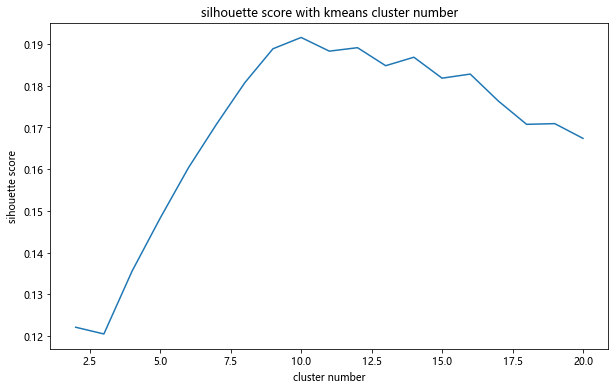

KMeans test end!


In [18]:
print('KMeans cluster test begin!')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

digits_train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra',header=None)
# print(digits_train)
digits_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes',header=None)
x_train = digits_train.iloc[:,:64]
y_train = digits_train.iloc[:,64]
x_test = digits_test.iloc[:,:64]
y_test = digits_test.iloc[:,64]

# 模型拟合
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(x_train,y_train)
y_predict = kmeans.predict(x_test)
# print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

# 模型评估
from sklearn.metrics import adjusted_rand_score
ars = adjusted_rand_score(y_test,y_predict)
print('adjusted rand score:',ars)
from sklearn.metrics import silhouette_score
# kmeans2 = KMeans(n_clusters=10)
# kmeans2.fit(x_train)
shs = silhouette_score(x_test,y_predict,metric='euclidean')         # 轮廓系数：越大越好
print('silhouette score:',shs)

shs_list = []
for i in range(2,21):
    kmeans_i = KMeans(n_clusters=i).fit(x_train)
    shs = silhouette_score(x_train,kmeans_i.labels_,metric='euclidean')
    shs_list.append(shs)
plt.figure(1,figsize=[10,6])
plt.plot(range(2,21),shs_list)
plt.title('silhouette score with kmeans cluster number')
plt.xlabel('cluster number')
plt.ylabel('sihouette score')
plt.show()

print('KMeans test end!')

PCA test begin!



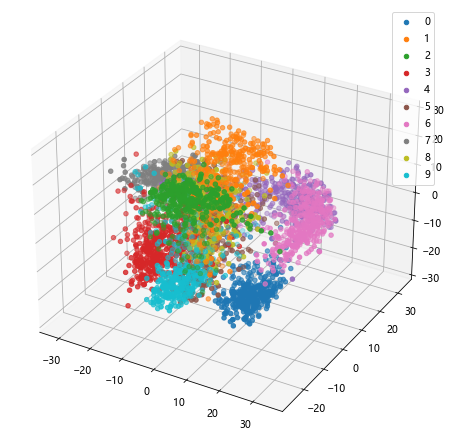

classification report of linear SVC:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       178
           1       0.95      0.99      0.97       182
           2       0.99      0.99      0.99       177
           3       0.99      0.96      0.97       183
           4       0.99      0.99      0.99       181
           5       0.96      0.99      0.98       182
           6       1.00      0.99      0.99       181
           7       0.99      0.94      0.96       179
           8       0.97      0.94      0.95       174
           9       0.93      0.98      0.95       180

    accuracy                           0.98      1797
   macro avg       0.98      0.98      0.98      1797
weighted avg       0.98      0.98      0.98      1797


classification report of PCA linear SVC:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       178
           1       0.95      0.99      0.97       1

In [51]:
print('PCA test begin!\n')

import pandas as pd

digits_train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra',header=None)
digits_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes',header=None)
# print(digits_train.shape,digits_test.shape)

x_train = digits_train.iloc[:,0:64]
y_train = digits_train.iloc[:,64]
x_test = digits_test.iloc[:,0:64]
y_test = digits_test.iloc[:,64]

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_pca_scatter():
    fig = plt.figure(1,figsize=[6,6])
    ax = Axes3D(fig)
    # colors = ['black','ble']
    class_nums = 10
    for i in range(class_nums):
        px = x_train_pca[y_train==i][:,0]
        py = x_train_pca[y_train==i][:,1]        
        pz = x_train_pca[y_train==i][:,2]        
        ax.scatter(px,py,pz)
    legend_list = [str(i) for i in range(10)]
    plt.legend(legend_list)
    plt.show()
plot_pca_scatter()

from sklearn.svm import LinearSVC,SVC
# lsvc = LinearSVC()
lsvc = SVC(kernel='rbf')
lsvc.fit(x_train,y_train)
y_lsvc_predict = lsvc.predict(x_test)

# lsvc_pca = LinearSVC()
lsvc_pca = SVC(kernel='rbf')
lsvc_pca.fit(x_train,y_train)
y_lsvc_pca_predict = lsvc_pca.predict(x_test)

from sklearn.metrics import classification_report
legend_list = [str(i) for i in range(10)]   
cr_lsvc = classification_report(y_test,y_lsvc_predict,target_names=legend_list)
cr_lsvc_pca = classification_report(y_test,y_lsvc_pca_predict,target_names=legend_list)
print('classification report of linear SVC:\n',cr_lsvc)
print('\nclassification report of PCA linear SVC:\n',cr_lsvc_pca)
print('\nPCA test end!')